In [2]:
%cd ..

/home/dani2442/Projects/bifurcationjax


/home/dani2442/Projects/bifurcationjax/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [32]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

from bifurcationjax.continuation.Corrector import NaturalCorrector
from bifurcationjax.continuation.Predictor import TangentPredictor, NaturalPredictor
from bifurcationjax.continuation.Continuation import continuation
from bifurcationjax.BifurcationProblem import BifurcationProblem
from bifurcationjax.utils.Branch import ContinuationPar
from bifurcationjax.utils.plot import plot_bifurcation_diagram

In [33]:
N = 100
h = 1/N
a=3

In [34]:
@jax.jit
def F(x, p):
    u_xx = (x[2:] + x[:-2] - x[1:-1])/h
    output = jnp.zeros((N,))
    calculation = u_xx + p*x[1:-1] - a*jnp.pow(x[1:-1],3)
    return jax.lax.dynamic_update_slice(output, calculation, (1,))

In [35]:
p_min = -1
p_max = 1
p0 = 0
x0 = jnp.zeros((N,))

In [40]:
prob = BifurcationProblem(F, x0, p0,)
correction = NaturalCorrector()
par = ContinuationPar(p_min=-1, p_max=1., dsmax=0.03)
prediction = NaturalPredictor()
branches = continuation(prob, prediction, correction, par)

In [38]:
branches.branches[1].points

deque([Point(z=Array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32), itnewton=None, itlinear=None, ds=None, n_unstable=Array(0, dtype=int32), n_imag=Array(0, dtype=int32), stable=Array(True, dtype=bool), step=999, evals=Array([nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
              nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj,
              nan+nanj, nan+nanj, nan+nanj, nan+nanj, nan+nanj, na

In [27]:
vars(branches)

mappingproxy({'__module__': 'bifurcationjax.utils.Branch',
              '__annotations__': {'branches': typing.List[bifurcationjax.utils.Branch.Branch],
               'bps': typing.Dict[bifurcationjax.utils.Branch.Point, typing.Set[int]]},
              'branches': [<bifurcationjax.utils.Branch.Branch at 0x7fcafc6730a0>,
              'bps': {},
              'get_bp': <function bifurcationjax.utils.Branch.Diagram.get_bp(p: bifurcationjax.utils.Branch.Point) -> Optional[bifurcationjax.utils.Branch.Point]>,
              'add_bp': <function bifurcationjax.utils.Branch.Diagram.add_bp(p: bifurcationjax.utils.Branch.Point, branches: List[bifurcationjax.utils.Branch.Branch])>,
              '__dict__': <attribute '__dict__' of 'Diagram' objects>,
              '__weakref__': <attribute '__weakref__' of 'Diagram' objects>,
              '__doc__': None})

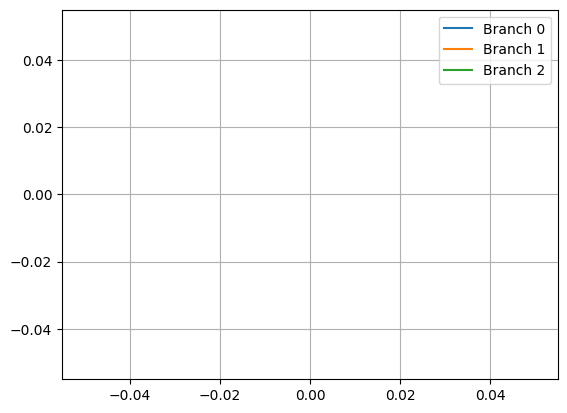

In [39]:
plot_bifurcation_diagram(branches)

In [6]:
dict_color = {'bp':0, 'hopf':1, 'nd':2}

In [7]:
cmap = plt.get_cmap()

/tmp/ipykernel_43908/2350278949.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(p,x[0], c=cmap(dict_color[tp]), label=tp)


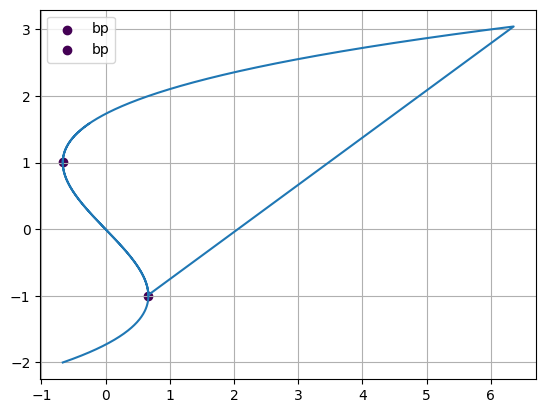

In [10]:
fig, ax = plt.subplots()
for tp, p, x in zip(tps, ps, xs):
    if tp is not None:
        ax.scatter(p,x[0], c=cmap(dict_color[tp]), label=tp)
ax.plot(ps[:1500], [x[0] for i, x in enumerate(xs) if i<1500])
plt.grid()
plt.legend()
plt.show()

ValueError: 'c' argument has 633 elements, which is inconsistent with 'x' and 'y' with size 2635.

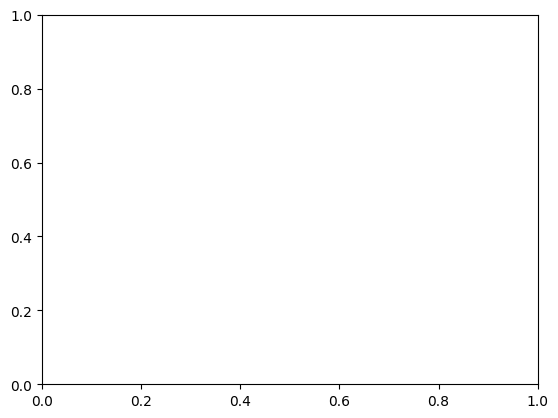

In [9]:
colors = ["blue" if s else "red" for s in stability]

plt.scatter(ps, [x[0] for x in xs], c=colors)
plt.grid()
plt.show()